In [319]:
import numpy as np
import numpy.random as npr
import json
import os
import autograd.numpy as np
import autograd.numpy.random as npr
import os
from glm_utils import load_session_fold_lookup, load_data, load_animal_list, \
    fit_glm, plot_input_vectors, append_zeros

os.getcwd()

'/Users/cecelia/Desktop/glm-hmm/2_fit_models/fit_glm'

In [294]:
from sklearn.preprocessing import StandardScaler
C = 2  # number of output types/categories -> vertical, horizontal
N_initializations = 10
data_dir = data_dir = '/Users/cecelia/Desktop/glm-hmm/data/data_for_cluster/'
num_folds = 3
results_dir = '/Users/cecelia/Desktop/glm-hmm/results/global_fit/'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
animal_file = data_dir + 'all_animals_concat.npz'
inpt, y, session = load_data(animal_file)
session_fold_lookup_table = load_session_fold_lookup(
    data_dir + 'all_animals_concat_session_fold_lookup.npz')

In [320]:
fold = 0
animal_file = data_dir + 'all_animals_concat.npz'
inpt, y, session = load_data(animal_file)
session_fold_lookup_table = load_session_fold_lookup(
    data_dir + 'all_animals_concat_session_fold_lookup.npz')



In [321]:
data_dir = '/Users/cecelia/Desktop/glm-hmm/data/data_for_cluster/'
animal_file = data_dir + 'all_animals_concat.npz'
inpt, y, session = load_data(animal_file)
session_fold_lookup_table = load_session_fold_lookup(
    data_dir + 'all_animals_concat_session_fold_lookup.npz')


In [322]:
y = y.astype('int')
figure_directory = results_dir + "GLM/fold_" + str(fold) + '/'
if not os.path.exists(figure_directory):
    os.makedirs(figure_directory)
y.shape

(732, 1)

In [323]:
sessions_to_keep = session_fold_lookup_table[np.where(
session_fold_lookup_table[:, 1] != fold), 0]
idx_this_fold = [
    str(sess) in sessions_to_keep and y[id, 0] != -1
    for id, sess in enumerate(session)
]


In [324]:
this_inpt, this_y, this_session = inpt[idx_this_fold, :], \
                                              y[idx_this_fold, :], \
                                              session[idx_this_fold]
assert len(
    np.unique(this_y)
) == 2, "choice vector should only include 2 possible values"
train_size = this_inpt.shape[0]
M = this_inpt.shape[1] # number of inputs
loglikelihood_train_vector = []

In [325]:
loglikelihood_train, recovered_weights = fit_glm([this_inpt], [this_y], M, 2)
loglikelihood_train

-9.270852868223912e-05

In [326]:
recovered_weights

array([[[-15.89464929,   0.98754196,  -0.12369611,   0.02612949,
           1.10704697]]])

In [328]:
weights_for_plotting = append_zeros(recovered_weights) 
weights_for_plotting 


array([[[-15.89464929,   0.98754196,  -0.12369611,   0.02612949,
           1.10704697],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ]]])

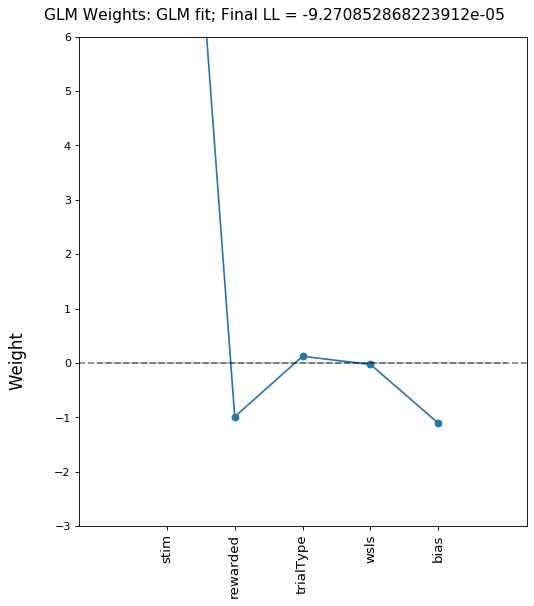

In [329]:
labels_for_plot = labels_for_plot = ['stim',\
                            'rewarded', 'trialType', 'wsls', 'bias']
plot_input_vectors(weights_for_plotting,
                                   figure_directory,
                                   title="GLM fit; Final LL = " +
                                   str(loglikelihood_train),
                                   save_title='init' + str(iter),
                                   labels_for_plot=labels_for_plot)